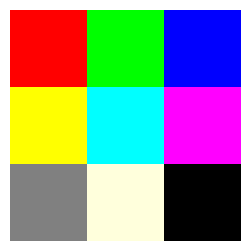

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((3,3,3), dtype=np.uint8)

M[0,0] = [255, 0, 0] #VERMELHO
M[0,1] = [0,255, 0] #VERDE
M[0,2] = [0, 0, 255] #AZUL

M[1,0] = [255,255,0] #AMARELO
M[1,1] = [0, 255, 255] #CIANO
M[1,2] = [255,0,255] #MAGENTA

M[2,0] = [128,128,128] #CINZA
M[2,1] = [255,255,220] # BRANCO
M[2,2] = [0,0,0] #PRETO

plt.figure(figsize=(3,3))
im=plt.imshow(M)
plt.axis("off")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


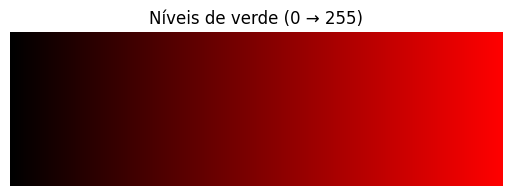

In [3]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((80,256,3), dtype=np.uint8)

for i in range(256):
  M[:,i,0] = i


plt.figure(figsize=(8,2))
plt.imshow(M)
plt.axis("off")
plt.title("Níveis de verde (0 → 255)")
plt.show

print(M[:,i,2])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


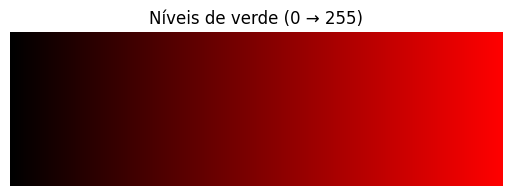

In [4]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((80,256,3), dtype=np.uint8)

for i in range(256):
  M[:,i,0] = i


plt.figure(figsize=(8,2))
plt.imshow(M)
plt.axis("off")
plt.title("Níveis de verde (0 → 255)")
plt.show

print(M[:,i,2])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255]


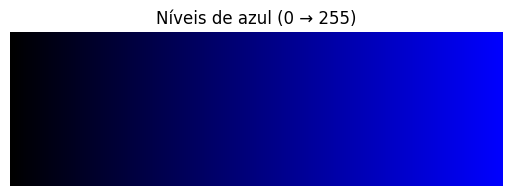

In [5]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((80,256,3), dtype=np.uint8)

for i in range(256):
  M[:,i,2] = i


plt.figure(figsize=(8,2))
plt.imshow(M)
plt.axis("off")
plt.title("Níveis de azul (0 → 255)")
plt.show

print(M[:,i,2])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

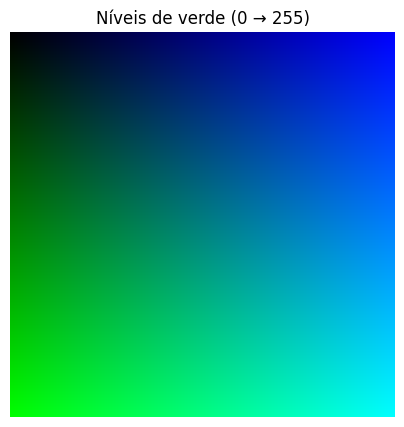

In [6]:
import numpy as np
import matplotlib.pyplot as plt

M = np.zeros((256,256,3), dtype=np.uint8)


for i in range(256):
  for j in range(256):
     M[i,j,2] = j
     M[i,j,1] = i

plt.figure(figsize=(5,5))
plt.imshow(M)
plt.axis("off")
plt.title("Níveis de verde (0 → 255)")
plt.show

print(M[:,i,2])

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

fg = Image.open('/content/Gru.jpg').convert('RGB')
bg = Image.open('/content/Blackpink.jpeg').convert('RGB')

bg = bg.resize(fg.size, resample=Image.BILINEAR)

fg = np.array(fg, dtype=np.uint8)
bg = np.array(bg, dtype=np.uint8)

G_MIN = 80
DOM_MARGIN = 20
K = 0

R = fg[...,0].astype(np.int16)
G = fg[...,1].astype(np.int16)
B = fg[...,2].astype(np.int16)

mask_abs = (G > G_MIN) & (G > R + DOM_MARGIN) & (G > B + DOM_MARGIN)

mask_ratio = (G > G_MIN) & (G > (K * R)) & (G > (K * B))

mask = mask_abs & mask_ratio

out = fg.copy()
out[mask] = bg[mask]

fig, axs = plt.subplots(1, 3, figsize=(12,4))
axs[0].imshow(fg);axs[0].set_title('Foreground(fundo verde)');axs[0].axis('off')
axs[1].imshow(mask,cmap='gray');axs[1].set_title('Máscara de verde');axs[1].axis('off')
axs[2].imshow(out);axs[2].set_title('Resultado chroma key');axs[2].axis('off')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Gru.jpg'